# A Python implementation of gradient descent in 1D

Alex Chen

Code adapt from: 

-# COURSE: A deep understanding of deep learning

-## SECTION: Gradient descent

-### LECTURE: Gradient descent in 1D

-#### TEACHER: Mike X Cohen, sincxpress.com

-##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202210

In [37]:
# import all necessary modules
import numpy as np
import math
import matplotlib.pyplot as plt
from typing import Callable

from IPython import display
# display.set_matplotlib_formats('svg')

In [38]:
def make_plot(x:np.array, fx:Callable, deriv:Callable, localmin:float=None) -> None:
    '''creates plot using input array x and the function as well as its derivative
    If a local minima is provided, plot the point as well'''
    plt.plot(x,fx(x), x,deriv(x))
    if localmin is not None:
        plt.plot(localmin,deriv(localmin),'ro')
        plt.plot(localmin,fx(localmin),'ro')
        plt.title('Empirical local minimum: %s'%localmin[0])

    plt.xlim(x[[0,-1]])
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend(['f(x)','df','f(x) min'])
    
    plt.show()

# Gradient descent in 1D

In [39]:
# define the function and the derivative of that function calculated by hand(as a function)
def fx(x):
  return np.cos(2 * math.pi * x) + x ** 2

# derivative function
def deriv(x):
  return -2 * math.pi * np.sin(2 * math.pi * x) + 2 * x

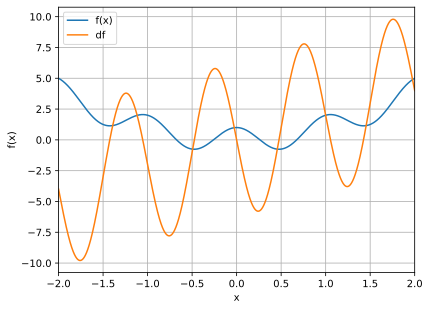

In [40]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

make_plot(x, fx, deriv)

[0.534]


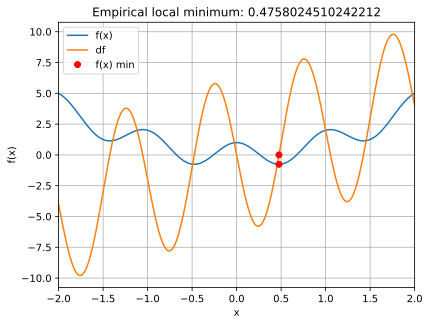

[0.382]


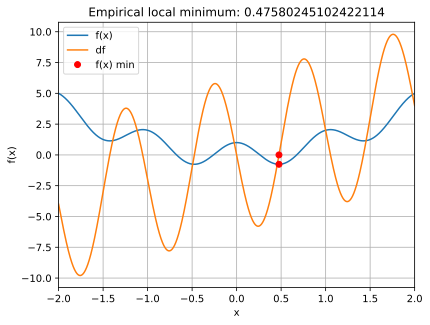

In [41]:
# As seen from the plots, there are multiple points where the derivative is 0, and there are multiple 
# local minima that the gradient descent can settle into. 
# Here I start from a random value twice and show that 1d gradient descent found diff local minima
for i in range(2):
  # random starting point
  localmin = np.random.choice(x,1)
  print(localmin)

  # learning parameters
  learning_rate = .01
  training_epochs = 100

  # run through training
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad

  # plot the results
  make_plot(x, fx, deriv, localmin)

[0]


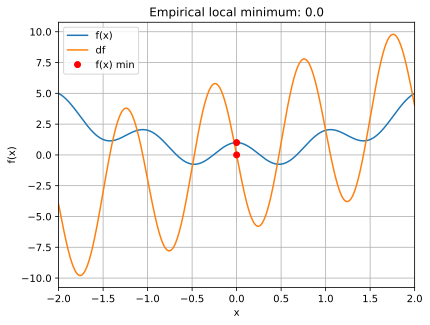

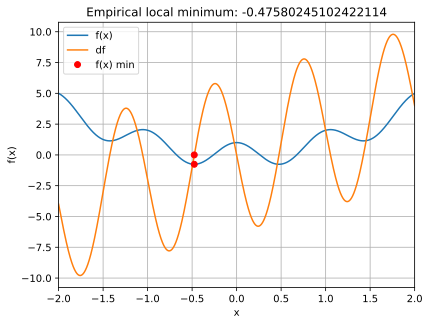

In [42]:
# if the starting point derivative is 0, such as in the case where starting at x=0, the gradient is 0
# So the step size learning_rate * gradient is 0, and gradient descent does not happen.
# to mitigate that, here I introduce a random perturbation to the gradient if the gradient is 0

# random starting point
localmin = np.array([0])
print(localmin)

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
# plot the results
make_plot(x, fx, deriv, localmin)

# Here I add a random perturbation to the gradient if the gradient is 0
# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  if grad == 0:
    grad = np.random.uniform(-0.01, 0.01)
  localmin = localmin - learning_rate*grad
# plot the results
make_plot(x, fx, deriv, localmin)